<a href="https://colab.research.google.com/github/aaayup/anomaly_detection/blob/main/ARIMA(uniform).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data 불러오기

In [73]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime

In [74]:
df=pd.read_csv('/content/uniform_train_set.csv')
df = df.copy()
df.head()

,heart_rate1,event1,heart_rate10,event10,heart_rate100,event100,heart_rate1000,event1000,heart_rate101,event101,...,event995,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,update_time
0,100,0,83,0,76,0,66,0,97,0,...,0,73,0,62,0,96,0,78,0,01JAN2020:00:00:00
1,79,0,91,0,77,0,83,0,96,0,...,0,88,0,96,0,96,0,91,0,01JAN2020:00:10:00
2,61,0,69,0,87,0,91,0,83,0,...,0,89,0,95,0,98,0,78,0,01JAN2020:00:20:00
3,71,0,66,0,89,0,89,0,93,0,...,0,94,0,75,0,100,0,88,0,01JAN2020:00:30:00
4,90,0,90,0,69,0,67,0,95,0,...,0,90,0,66,0,68,0,98,0,01JAN2020:00:40:00


In [75]:
df.shape

(1350, 2001)

In [76]:
#변수 선택
df = df[['heart_rate1','event1','update_time']]
df.head()

,heart_rate1,event1,update_time
0,100,0,01JAN2020:00:00:00
1,79,0,01JAN2020:00:10:00
2,61,0,01JAN2020:00:20:00
3,71,0,01JAN2020:00:30:00
4,90,0,01JAN2020:00:40:00


In [77]:
# update_time -> 날짜변수로 변경
df['update_time'] = pd.to_datetime(df['update_time'], format='%d%b%Y:%H:%M:%S')
df.head()

,heart_rate1,event1,update_time
0,100,0,2020-01-01 00:00:00
1,79,0,2020-01-01 00:10:00
2,61,0,2020-01-01 00:20:00
3,71,0,2020-01-01 00:30:00
4,90,0,2020-01-01 00:40:00


In [78]:
#날짜순 정렬(ascending=T : 오름차순)
df = df.sort_values(by='update_time', ascending=True)

idx = df['idx'] = range(1, dataset_length + 1)

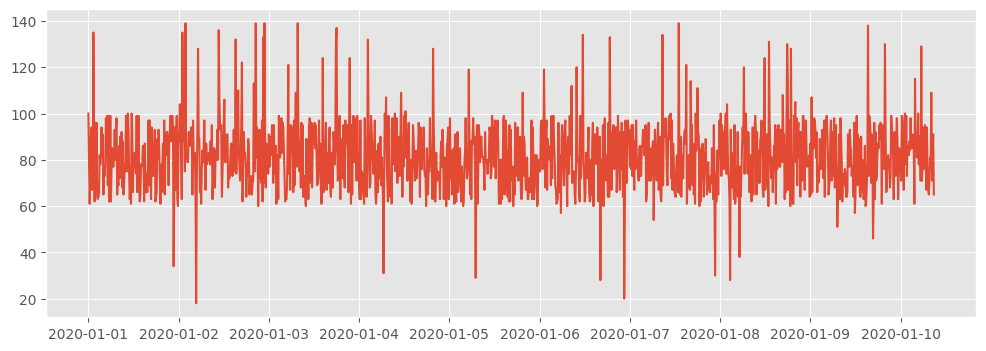

In [84]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(df['update_time'], df['heart_rate1'])
plt.show()

In [85]:
df_train = df[:1008]
df_test = df[1008:]
df_train.head()

,heart_rate1,event1,update_time,idx
0,100,0,2020-01-01 00:00:00,1
1,79,0,2020-01-01 00:10:00,2
2,61,0,2020-01-01 00:20:00,3
3,71,0,2020-01-01 00:30:00,4
4,90,0,2020-01-01 00:40:00,5


In [81]:
print('train dataset',df_train.shape)
print('test dataset' ,df_test.shape)

train dataset (1008, 4)
test dataset (342, 4)


In [82]:
event1_counts_train = df_train['event1'].value_counts()
event1_counts_test = df_test['event1'].value_counts()

# event 비율 계산
event1_ratio_train = event1_counts_train[1] / (event1_counts_train[0] +event1_counts_train[1])
event1_ratio_test = event1_counts_test[1] / (event1_counts_test[0] +event1_counts_test[1])
print('train', event1_ratio_train)
print('test', event1_ratio_test)

train 0.047619047619047616
test 0.05847953216374269


In [83]:
df_test.head(5)

,heart_rate1,event1,update_time,idx
1008,81,0,2020-01-08 00:00:00,1009
1009,100,0,2020-01-08 00:10:00,1010
1010,73,0,2020-01-08 00:20:00,1011
1011,95,0,2020-01-08 00:30:00,1012
1012,91,0,2020-01-08 00:40:00,1013


#STL 분해

<Figure size 1200x400 with 0 Axes>

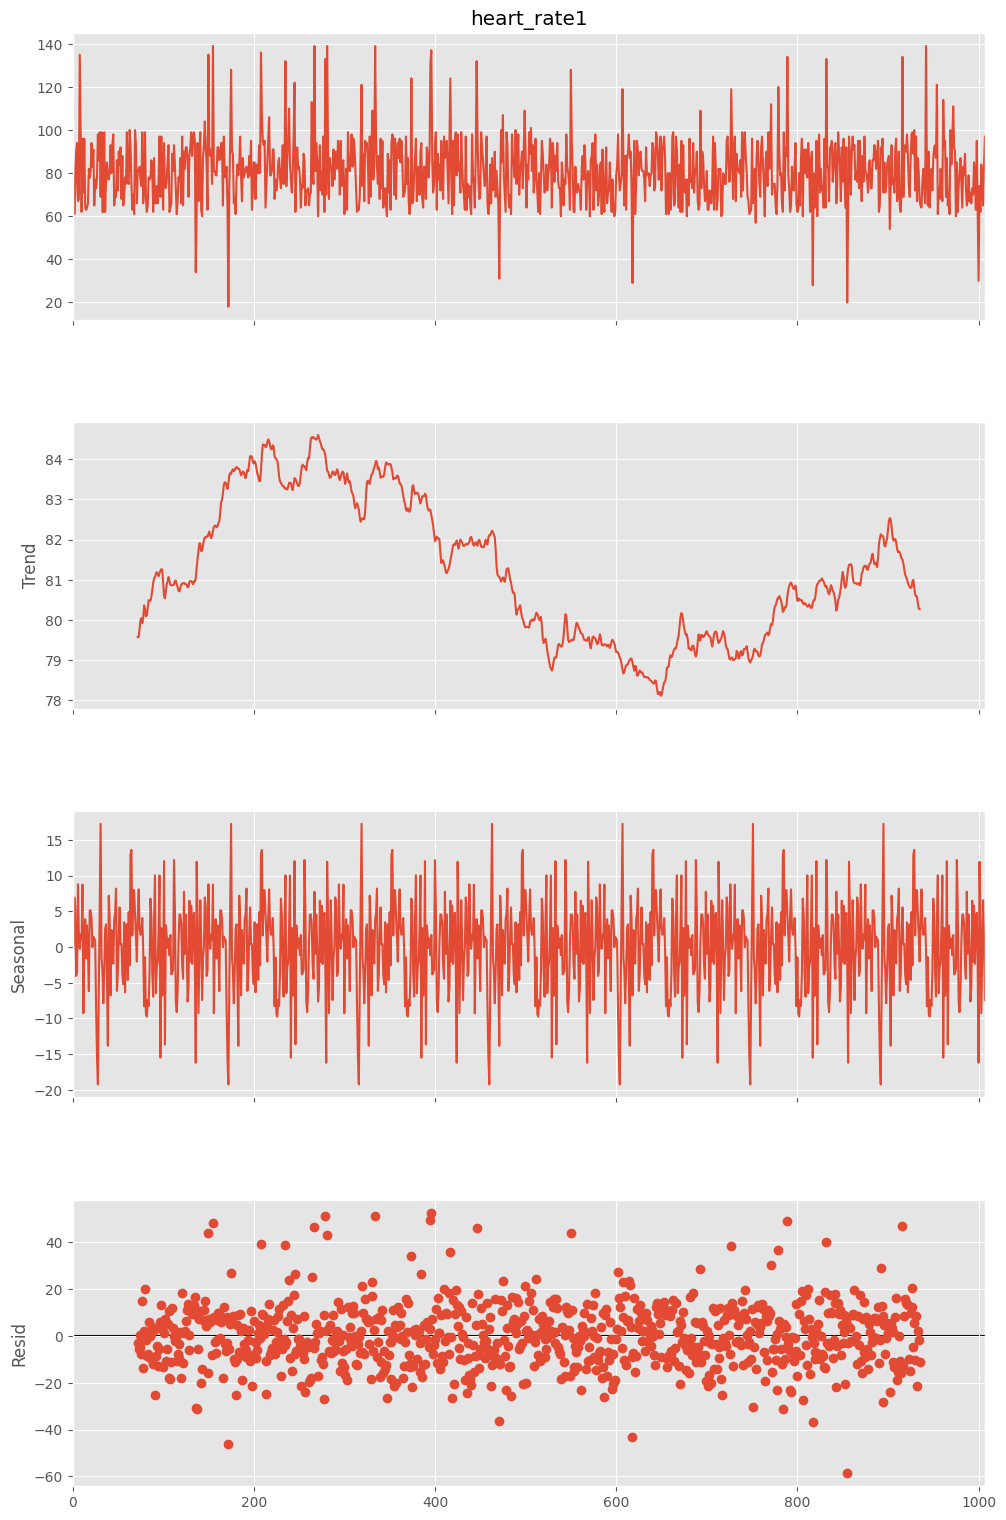

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose( df_train['heart_rate1'], period =144)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,18)

# Test

##ADF test

In [86]:
from statsmodels.tsa.stattools import adfuller
#Ho: 정상성 만족X
#H1: 정상성 만족O
# A function defined for Dickey Fuller Test
def adfuller_test(births):
    result=adfuller(births)     #adf검정
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:    #p : result[1] <= 0.05
        print("정상성 만족O")
    else:
        print("정상성 만족X ")

In [87]:
adfuller_test(df_train.iloc[:, 0])

ADF Test Statistic : -30.084408394295483
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1007
정상성 만족O


#ACF, PACF

## diff(0)

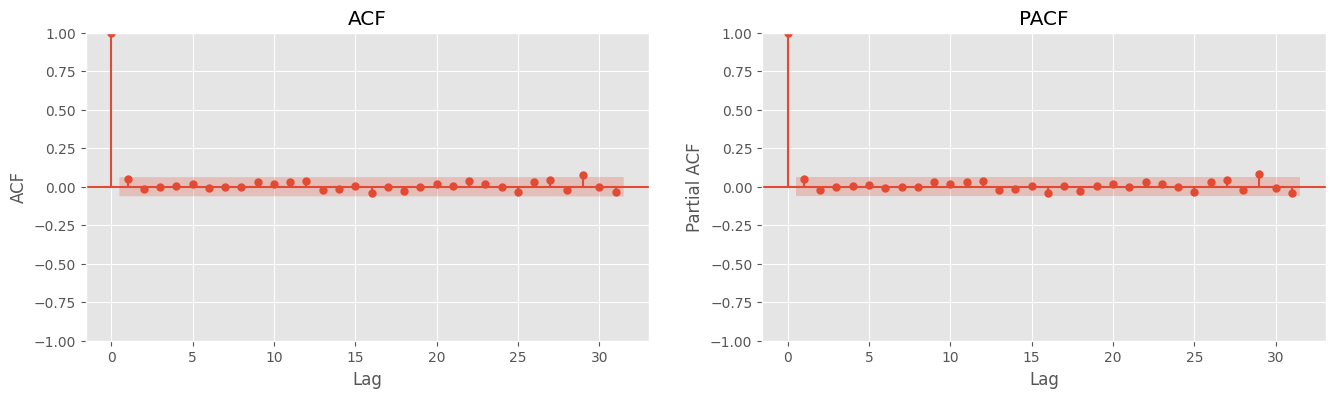

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(df_train.iloc[:,0], title='ACF',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(df_train.iloc[:,0], title='PACF',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

#ARIMA

##fit

In [89]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['heart_rate1'], order=(1,0,3))

result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            heart_rate1   No. Observations:                 1008
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -4148.848
Date:                Fri, 13 Oct 2023   AIC                           8309.696
Time:                        09:21:51   BIC                           8339.190
Sample:                             0   HQIC                          8320.902
                               - 1008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9828      0.513    158.002      0.000      79.978      81.987
ar.L1          0.2623     40.754      0.006      0.995     -79.613      80.138
ma.L1         -0.2088     40.755     -0.005      0.9

## Predict

In [90]:
df_test.tail()

,heart_rate1,event1,update_time,idx
1345,109,1,2020-01-10 08:10:00,1346
1346,71,0,2020-01-10 08:20:00,1347
1347,83,0,2020-01-10 08:30:00,1348
1348,91,0,2020-01-10 08:40:00,1349
1349,65,0,2020-01-10 08:50:00,1350


In [91]:
# Testset Predict
start_idx =  1008  # 테스트 데이터셋의 시작 인덱스
end_idx = 1008 + len(df_test)  # 테스트 데이터셋의 끝 인덱스

forecast = result.get_prediction(start=start_idx, end=end_idx, dynamic=False)

#신뢰구간과 pred 할당
forecast_ci = forecast.conf_int()
forecast_mean = forecast.predicted_mean

#신뢰구간 하한상한, pred 변수 생성
df_test['lower'] = forecast_ci.iloc[:,0]
df_test['upper'] = forecast_ci.iloc[:,1]
df_test['pred'] = forecast_mean

<ipython-input-91-4d2d25f70439>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['lower'] = forecast_ci.iloc[:,0]
<ipython-input-91-4d2d25f70439>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['upper'] = forecast_ci.iloc[:,1]
<ipython-input-91-4d2d25f70439>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [92]:
df_test

,heart_rate1,event1,update_time,idx,lower,upper,pred
1008,81,0,2020-01-08 00:00:00,1009,52.671375,110.823169,81.747272
1009,100,0,2020-01-08 00:10:00,1010,51.628516,109.863491,80.746004
1010,73,0,2020-01-08 00:20:00,1011,51.873489,110.115118,80.994304
1011,95,0,2020-01-08 00:30:00,1012,51.864960,110.106605,80.985782
1012,91,0,2020-01-08 00:40:00,1013,51.862724,110.104371,80.983547
...,...,...,...,...,...,...,...
1345,109,1,2020-01-10 08:10:00,1346,51.861930,110.103576,80.982753
1346,71,0,2020-01-10 08:20:00,1347,51.861930,110.103576,80.982753
1347,83,0,2020-01-10 08:30:00,1348,51.861930,110.103576,80.982753
1348,91,0,2020-01-10 08:40:00,1349,51.861930,110.103576,80.982753


In [93]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

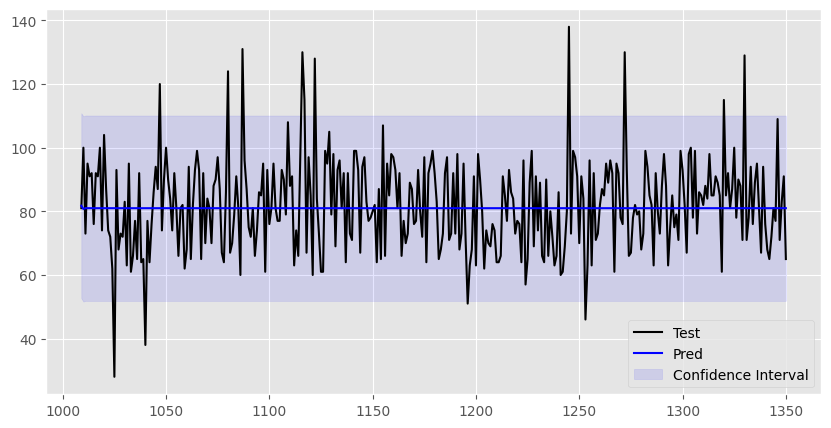

In [94]:
plt.figure(figsize=(10,5))
plt.plot(df_test['idx'], df_test.iloc[:,0],label="Test", color='black')
plt.plot(df_test['idx'], df_test.iloc[:,6],label="Pred", color='b')



plt.fill_between(df_test['idx'],  df_test['lower'], df_test['upper'], color='blue', alpha=0.1, label='Confidence Interval')

plt.legend()
plt.show()

In [95]:
# df_test에서 신뢰 구간을 벗어나는 데이터 추출
out_of_confidence_interval = df_test[(df_test['heart_rate1'] < df_test['lower']) | (df_test['heart_rate1'] > df_test['upper'])]

#pred_y에 이상치 1, 0 할당
df_test['pred_y'] = np.where((df_test['heart_rate1'] < df_test['lower']) | (df_test['heart_rate1'] > df_test['upper']), 1, 0)

df_test.head()

<ipython-input-95-5e0725b5412b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_y'] = np.where((df_test['heart_rate1'] < df_test['lower']) | (df_test['heart_rate1'] > df_test['upper']), 1, 0)


,heart_rate1,event1,update_time,idx,lower,upper,pred,pred_y
1008,81,0,2020-01-08 00:00:00,1009,52.671375,110.823169,81.747272,0
1009,100,0,2020-01-08 00:10:00,1010,51.628516,109.863491,80.746004,0
1010,73,0,2020-01-08 00:20:00,1011,51.873489,110.115118,80.994304,0
1011,95,0,2020-01-08 00:30:00,1012,51.864960,110.106605,80.985782,0
1012,91,0,2020-01-08 00:40:00,1013,51.862724,110.104371,80.983547,0


#Outlier

In [110]:
#실제 test셋 event와 예측 event의 비율 차이
print('실제 이상치 비율', event1_ratio_test)
print('예측 이상치 비율', (out_of_confidence_interval.shape[0]/df_test.shape[0]))

실제 이상치 비율 0.05847953216374269
예측 이상치 비율 0.04093567251461988


In [111]:
#이상치
  #Testset
print('Test',df_test.shape[0], '중에', out_of_confidence_interval.shape[0],'개', round((out_of_confidence_interval.shape[0]/df_test.shape[0]*100),2) ,'% 이상치')

Test 342 중에 14 개 4.09 % 이상치


In [112]:
print(event1_counts_test[1], '개 중에', out_of_confidence_interval.shape[0],'개 이상치로 판단')

20 개 중에 14 개 이상치로 판단


In [113]:
#실제 이상치를 맞게 예측한 개수
len(df_test[(df_test['event1'] == 1) & (df_test['pred_y'] == 1)])

14

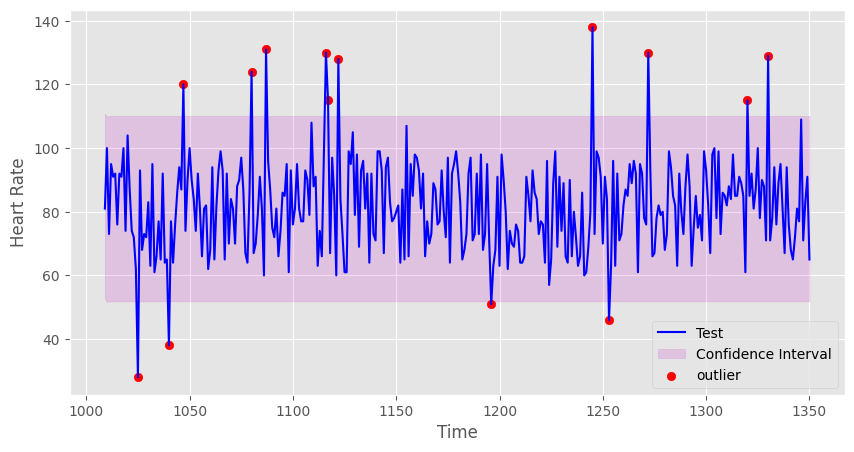

In [114]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(df_test['idx'], df_test['heart_rate1'], label="Test", color ='b')

plt.fill_between(df_test['idx'], df_test['lower'], df_test['upper'] , alpha=0.15, label='Confidence Interval', color = 'm')

# 추출된 행을 빨간 점으로 표시
plt.scatter(out_of_confidence_interval['idx'], out_of_confidence_interval['heart_rate1'], color='red', label="outlier")

plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()
plt.show()

In [115]:
#변수 삭제
df_pred = df_test.drop(['idx', 'upper', 'lower', 'pred'], axis=1)
df_pred.head()

,heart_rate1,event1,update_time,pred_y
1008,81,0,2020-01-08 00:00:00,0
1009,100,0,2020-01-08 00:10:00,0
1010,73,0,2020-01-08 00:20:00,0
1011,95,0,2020-01-08 00:30:00,0
1012,91,0,2020-01-08 00:40:00,0


In [116]:
from google.colab import files
df_pred.to_csv('ARIMA_uniform.csv', index=False)


# CSV 파일 다운로드
#files.download('ARIMA_uniform.csv')